# Analysis of vdWHs

## Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import ase.units

Hartree = ase.units.Hartree
Bohr = ase.units.Bohr

In [4]:
nFilling = 1
nPadding = 0
def load_hs(fileprefix, nFilling=1, nPadding=0):
    vdWH = np.load(fileprefix + '_nFilling=' + str(nFilling) + '_nPadding=' + str(nPadding)+ '.npz')
    return vdWH

In [3]:
vdWH = load_hs('vdWH')
E_b = vdWH['E_b']
E_b_analytic = vdWH['E_b_analytic']
E_b_analytic_const_d = vdWH['E_b_analytic_const_d']

E_b_heat_mat = vdWH['E_b_heat_mat']
E_b_analytic_heat_mat = vdWH['E_b_analytic_heat_mat']
E_b_analytic_const_d_heat_mat = vdWH['E_b_analytic_const_d_heat_mat']

# E_b_heat_xlabels = [l[:2] + l[4:] for l in vdWH['E_b_heat_xlabels']]
# E_b_heat_ylabels = [l[:2] + l[4:] for l in vdWH['E_b_heat_ylabels']]
E_b_heat_xlabels = [l[4:] for l in vdWH['E_b_heat_xlabels']]
E_b_heat_ylabels = [l[4:] for l in vdWH['E_b_heat_ylabels']]
bilayers = vdWH['bilayers']

In [4]:
d0 = np.round(np.mean(vdWH['distances']),1)

In [5]:
from matplotlib import rcParams
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    "font.size": 16})
rcParams['axes.titlepad'] = 20

In [6]:
vmin = np.min(np.hstack([E_b, E_b_analytic, E_b_analytic_const_d]))*10**3
vmax = np.max(np.hstack([E_b, E_b_analytic, E_b_analytic_const_d]))*10**3

## Exciton Binding Energies

In [7]:
# Sort by qeh-matrix
argsort_row = np.argsort(np.mean(E_b_heat_mat, axis=1))[::-1]
argsort_col = np.argsort(np.mean(E_b_heat_mat[argsort_row,:], axis=0))
E_b_sorted = E_b_heat_mat[argsort_row,:][:,argsort_col]
E_b_analytic_sorted = E_b_analytic_heat_mat[argsort_row,:][:,argsort_col]
E_b_analytic_const_d_sorted = E_b_analytic_const_d_heat_mat[argsort_row,:][:,argsort_col]

xlabels_sorted = np.take(E_b_heat_xlabels,argsort_col)
ylabels_sorted = np.take(E_b_heat_ylabels,argsort_row)

In [8]:
def heatmap(data, xlabels, ylabels, cbarlabel, show_annotations, xlabel, ylabel, cmap, **kwargs):
    # if not ax:
    #     ax = plt.gca()
    
    plt.imshow(data, cmap=cmap, **kwargs)

    if xlabel != '' or ylabel != '':
        plt.xlabel(xlabel, fontsize = 20)
        plt.ylabel(ylabel, fontsize = 20)
    # Magic code to make colorbar span height of plot
    im_ratio = data.shape[0]/data.shape[1]
    plt.colorbar(label=cbarlabel,fraction=0.046*im_ratio, pad=0.04)
    # cbar.ax.set_ylabel(cbarlabel, rotation=0, va="bottom")

    if show_annotations:
        plt.xticks(np.arange(len(xlabels)), labels=xlabels)
        plt.yticks(np.arange(len(ylabels)), labels=ylabels)

        for ticklabel, label in zip(plt.gca().get_xticklabels() + plt.gca().get_yticklabels(), list(xlabels) + list(ylabels)):
            if 'O2' in label:
                ticklabel.set_color('darkred')
            # else:
            #     ticklabel.set_color('tab:green')

        # Loop over data dimensions and create text annotations.
        for i in range(len(ylabels)):
            for j in range(len(xlabels)):
                # Ensure text color has enough contrast
                # with background to be readable.
                color_map = plt.get_cmap(cmap)

                colors = [color_map(1.0), color_map(0.0)]
                # color = colors[int(data[i,j] > np.mean(data))]
                # color = colors[int(data[i,j] > vmin+0.5*(vmax-vmin))]
                color = 'k'
                plt.text(j, i, data[i, j], ha="center", va="center", color=color)
    else:
        # plt.xticks(np.arange(len(xlabels)), labels=[l[2:] for l in xlabels])
        # plt.yticks(np.arange(len(ylabels)), labels=[l[2:] for l in ylabels])
        plt.xticks(np.arange(len(xlabels)), labels=xlabels)
        plt.yticks(np.arange(len(ylabels)), labels=ylabels)
        #plt.xticks(np.arange(len(xlabels)), labels=['Ox.' if 'O2' in label else 'TMD' for label in xlabels])
        #plt.yticks(np.arange(len(ylabels)), labels=['Ox.' if 'O2' in label else 'TMD'for label in ylabels])

        for ticklabel, label in zip(plt.gca().get_xticklabels() + plt.gca().get_yticklabels(), list(xlabels) + list(ylabels)):
            if 'O2' in label:
                ticklabel.set_color('darkred')
            # else:
            #     ticklabel.set_color('tab:green')
    plt.xticks(rotation=90, ha='center')

def plot_E_b(E_b_heat_mat,xlabels,ylabels, cbarlabel = r'$E_b$ [meV]', file_ending='unknown', show_annotations=True, xlabel='', ylabel='', **kwargs):
    heatmap(np.round(E_b_heat_mat*10**3).astype(int),
        xlabels, ylabels, cbarlabel=cbarlabel, show_annotations=show_annotations,
        cmap='Blues', xlabel=xlabel, ylabel=ylabel, **kwargs)
    plt.tight_layout()
    plt.savefig('./plots/E_b_' + file_ending + '.pdf')
    plt.savefig('./plots/E_b_' + file_ending + '.png')
    plt.show()

In [9]:
xlabel, ylabel = r'\textbf{p-doped monolayer}', r'\textbf{n-doped monolayer}'

In [10]:
# fig = plt.figure(1, figsize=(15,15))
# plot_E_b(E_b_heat_mat, E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel = r'$E_b$ [meV] from QEH $W^i$', file_ending='qeh_unsorted', xlabel=xlabel, ylabel=ylabel, vmin=vmin,vmax=vmax)

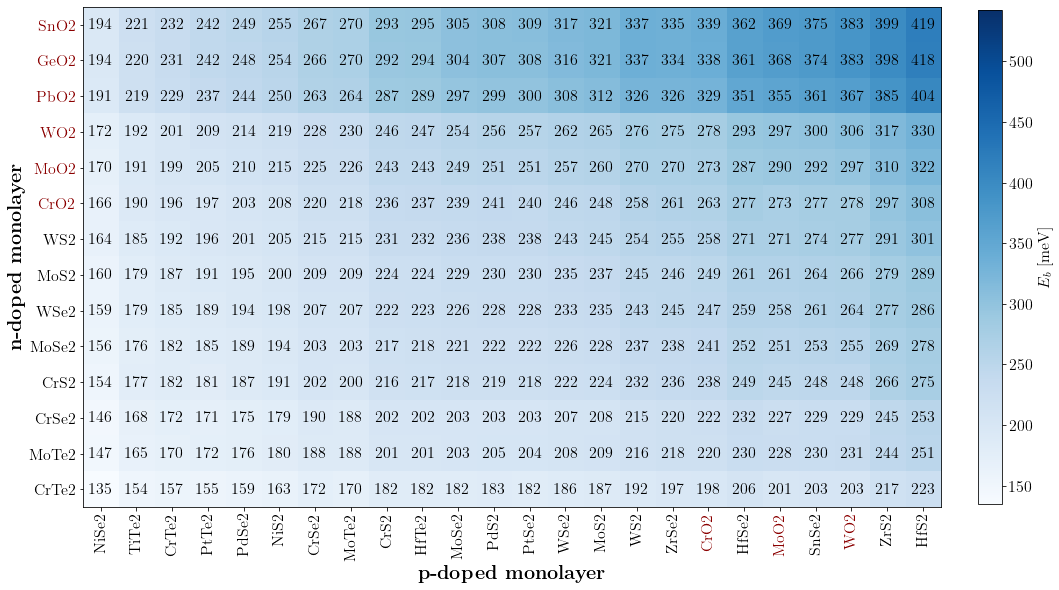

In [11]:
fig = plt.figure(1, figsize=(15,8.5))
# plot_E_b(E_b_sorted, xlabels_sorted, ylabels_sorted, cbarlabel = r'$E_b$ [meV] using ab initio $\epsilon^i$', file_ending='qeh_sorted', xlabel=xlabel, ylabel=ylabel, vmin=vmin, vmax=vmax)
plot_E_b(E_b_sorted, xlabels_sorted, ylabels_sorted, cbarlabel = r'$E_b$ [meV]', file_ending='qeh_sorted', xlabel=xlabel, ylabel=ylabel, vmin=vmin, vmax=vmax)

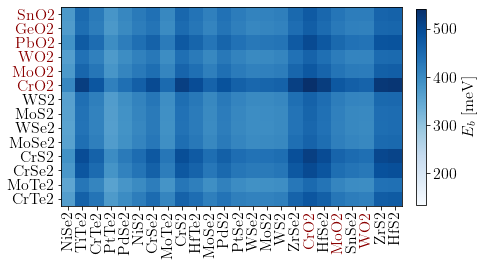

In [12]:
fig = plt.figure(1, figsize=(7,4))
# plot_E_b(E_b_analytic_sorted, xlabels_sorted, ylabels_sorted, cbarlabel = r'$E_b$ [meV] with fixed $\epsilon^i = 2$', file_ending='analytic_sorted', show_annotations=False, vmin=vmin,vmax=vmax)
plot_E_b(E_b_analytic_sorted, xlabels_sorted, ylabels_sorted, cbarlabel = r'$E_b$ [meV]', file_ending='analytic_sorted', show_annotations=False, vmin=vmin,vmax=vmax)

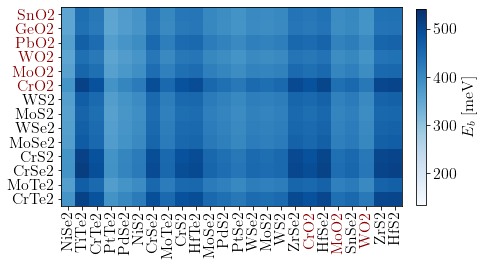

In [13]:
fig = plt.figure(1, figsize=(7,4))
# plot_E_b(E_b_analytic_const_d_sorted, xlabels_sorted, ylabels_sorted, cbarlabel = r'$E_b$ [meV] with fixed $\epsilon^i \!=\! 2, d\!=\!' + str(d0) + '$ Å', file_ending='analytic_const_d_sorted', show_annotations=False, vmin=vmin, vmax=vmax)
plot_E_b(E_b_analytic_const_d_sorted, xlabels_sorted, ylabels_sorted, cbarlabel = r'$E_b$ [meV]', file_ending='analytic_const_d_sorted', show_annotations=False, vmin=vmin, vmax=vmax)

## Effective Interactions

In [14]:
from default_parameters import get_thickness as get_default_thickness

# load materials
materials_dict = np.load('./Materials_iso_stable.npz')
thicknesses = materials_dict['d_List']
materials = materials_dict['Mat_plot_iso']

def get_thickness(layer):
    try:
        return thicknesses[layer==materials][0]
    except:
        return get_default_thickness('BN')

In [15]:
def get_color(bilayer_E_b, vmin, vmax, min_p = 0.6):
    cmap = plt.get_cmap('Blues')

    # def get_relative_percentile(x, min_p):
    #     E_combined = np.hstack([E_b, E_b_analytic, E_b_analytic_const_d])
    #     E_b_min = np.min(E_combined)
    #     return (1-min_p)*(x - E_b_min)/np.max(E_combined - E_b_min)

    # p = get_relative_percentile(bilayer_E_b, min_p)
    # return cmap(min_p + p)

    
    p = min_p + (1-min_p)*(bilayer_E_b*10**3 - vmin)/(vmax - vmin)
    return cmap(p)
markers = ['--', '-', ':']

Create custom color map starting from min_p percentile (to avoid lightest colors)

In [16]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def get_cmap(cmap, min_p, N_cmap=256):
    cmap = plt.get_cmap(cmap)
    return ListedColormap(cmap(np.linspace(0,1,int(N_cmap/(1-min_p))))[-N_cmap:,:])

In [17]:
def read_bilayer(bilayer, vdWH, postfix=''):
    '''@returns U_eh, U_eh_r, epsM, E_b
    '''
    i = list(vdWH['bilayers']).index(bilayer)
    hs_U_eh = vdWH['U_eh' + postfix][i]
    hs_U_eh_r = vdWH['U_eh_r' + postfix][i]
    hs_epsM = np.real(vdWH['epsM_analytic' if 'analytic' in postfix else 'epsM'][i])
    hs_E_b = vdWH['E_b' + postfix][i]
    return hs_U_eh, hs_U_eh_r, hs_epsM, hs_E_b

In [18]:
# Test functions:
U_eh_test, U_eh_r_test, epsM_test, E_b_test = read_bilayer('n-H-MoS2, p-H-WS2', vdWH, postfix='_analytic')
get_color(E_b[bilayers == 'n-H-MoS2, p-H-WS2'],vmin=vmin, vmax=vmax)

array([[0.17102653, 0.48475202, 0.73124183, 1.        ]])

In [19]:
r = vdWH['r']
q = vdWH['q']
q_anal = np.linspace(0.0001, q[-1], 300)
r_anal = r #np.linspace(0, r[-1], 10000)

eps_const = 2
U_ee_2D_coulomb = (2*np.pi/eps_const) * 1/np.abs(q_anal*Bohr)

d_BN = get_thickness('BN')
d_barrier = nFilling*d_BN
U_eh_2D_coulomb = -U_ee_2D_coulomb * np.exp(-(d_barrier/Bohr)*(q_anal*Bohr))

U_eh_2D_coulomb_r = Hartree * (1/eps_const) * 1/np.sqrt((r_anal/Bohr)**2 + (d_barrier/Bohr)**2)

In [20]:
E_b_min = E_b.min()*10**3
E_b_max = E_b.max()*10**3
min_p = 0.3 # Min percentile of color map (higher value means we start with darker colors for the Blues colormap)
vmin = E_b_min
vmax = E_b_max
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = get_cmap('Blues', min_p=min_p)

# Uncomment and use this to instead set color range from 0 to E_b_max:
# min_p = E_b_min/E_b_max
# vmin = (E_b_min - min_p * E_b_max)/(1 - min_p)
# cmap = plt.get_cmap('Blues')

### Dielectric Function

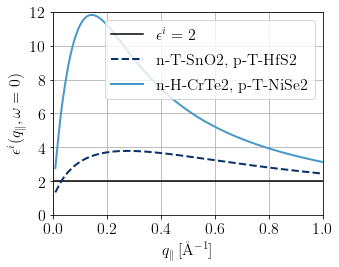

In [21]:
q_i_start = 2
plt.figure(2, figsize=(5,4))
plt.plot(np.linspace(0,1, 200), eps_const*np.ones(200),'k-', label=r'$\epsilon^i = 2$')
for (i, bilayer) in enumerate(['n-T-SnO2, p-T-HfS2', 'n-H-CrTe2, p-T-NiSe2']):
    _, _, epsM_hs, E_b_hs = read_bilayer(bilayer, vdWH)
    plt.plot(q[q_i_start:], epsM_hs[q_i_start:].real, markers[i % len(markers)], linewidth=2, label=bilayer, color=get_color(E_b_hs,vmin=E_b.min()*10**3,vmax=E_b.max()*10**3))
plt.xlim(0,1)
plt.ylim(0,12)
plt.xlabel(r'$q_\parallel \, [\mathrm{\AA^{-1}}$]')
plt.ylabel(r'$\epsilon^i(q_\parallel, \omega=0)$')
plt.legend()
# plt.title("Screened potential for all materials")
plt.grid()
plt.tight_layout()
plt.savefig('./plots/vdWH_epsM.pdf')
plt.savefig('./plots/vdWH_epsM.png')
plt.show()

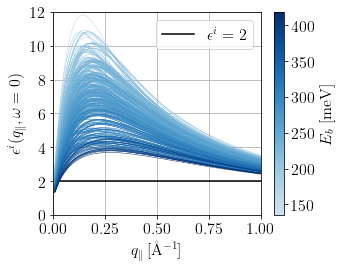

In [25]:
# q_i_start = 2
plt.figure(2, figsize=(5,4))
plt.plot(np.linspace(0,1, 200), eps_const*np.ones(200), 'k-', label=r'$\epsilon^i = 2$')
for (i, bilayer) in enumerate(bilayers[np.argsort(E_b)]):
    _, _, epsM_hs, E_b_hs = read_bilayer(bilayer, vdWH)
    color = get_color(E_b_hs, vmin=E_b_min, vmax=E_b_max, min_p=min_p)
    plt.plot(q[q_i_start:], epsM_hs[q_i_start:].real, '-', linewidth=0.5, color=color)
# plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', label=r'$E_b$ [meV] using ab initio $\epsilon^i$')
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', label=r'$E_b$ [meV]')
plt.xlim(0,1)
plt.ylim(0,12)
plt.xlabel(r'$q_\parallel \, [\mathrm{\AA^{-1}}$]')
plt.ylabel(r'$\epsilon^i(q_\parallel, \omega=0)$')
plt.legend()
# plt.title("Screened potential for all materials")
plt.grid()
plt.tight_layout()
plt.savefig('./plots/vdWH_epsM_all.pdf')
plt.savefig('./plots/vdWH_epsM_all.png')
plt.show()

### Effective real space interaction

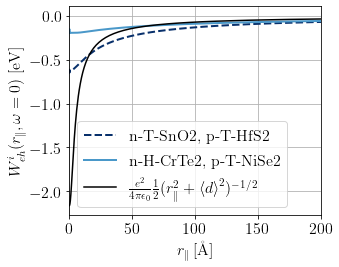

In [23]:
plt.figure(5, figsize=(5,4))
for (i, bilayer) in enumerate(['n-T-SnO2, p-T-HfS2', 'n-H-CrTe2, p-T-NiSe2']):
    _, U_eh_r_hs, _, E_b_hs = read_bilayer(bilayer, vdWH)
    color = get_color(E_b_hs, vmin=E_b_min, vmax=E_b_max)
    plt.plot(r, U_eh_r_hs, markers[i % len(markers)], linewidth=2, label=bilayer, color=color)
plt.plot(r_anal, -U_eh_2D_coulomb_r,'k-', label=r'$\frac{ e^2 }{ 4 \pi \epsilon_0} \frac{1}{2} (r_\parallel^2 + \left<d\right>^2)^{-1/2}$')
plt.xlim(0,200)
# plt.ylim(-300,0)
plt.xlabel(r'$r_\parallel \, [\mathrm{Å}$]')
plt.ylabel(r'$W^i_{eh}(r_\parallel, \omega=0)$ [eV]')
plt.legend()
# plt.title("Screened potential for all materials")
plt.grid()
plt.tight_layout()
plt.savefig('./plots/vdWH_U_eh_r.pdf')
plt.savefig('./plots/vdWH_U_eh_r.png')
plt.show()

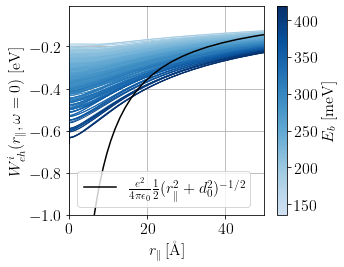

In [27]:
plt.figure(5, figsize=(5,4))
plt.xlim(0,50)
for (i, bilayer) in enumerate(bilayers[np.argsort(E_b)]):
    _, U_eh_r_hs, _, E_b_hs = read_bilayer(bilayer, vdWH)
    color = get_color(E_b_hs, vmin=E_b_min, vmax=E_b_max, min_p=min_p)
    plt.plot(r, U_eh_r_hs, '-', linewidth=1, color=color)
plt.plot(r_anal, -U_eh_2D_coulomb_r,'k-', label=r'$\frac{ e^2 }{ 4 \pi \epsilon_0} \frac{1}{2} (r_\parallel^2 + d_0^2)^{-1/2}$')
# plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', label=r'$E_b$ [meV] using ab initio $\epsilon^i$')
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', label=r'$E_b$ [meV]')
# plt.ylim(-1,0)
plt.ylim(-1,-0.01)
plt.xlabel(r'$r_\parallel \, [\mathrm{Å}$]')
plt.ylabel(r'$W^i_{eh}(r_\parallel, \omega=0)$ [eV]')
plt.legend()
# plt.title("Screened potential for all materials")
plt.grid()
plt.tight_layout()
plt.savefig('./plots/vdWH_U_eh_r_all.pdf')
plt.savefig('./plots/vdWH_U_eh_r_all.png')
plt.show()